In [1]:
import pandas as pd
data_pd = pd.read_csv('StreamingHistory_suj11.csv')

In [2]:
track_name = data_pd.trackName.unique()
len(track_name)

2328

In [3]:
df1 = data_pd['artistName'].value_counts().rename_axis('Artist').reset_index(name='No: of Artist')
df1.head(10)

Artist  No: of Artist
0       C. Tangana            375
1            Morad            303
2           Eminem            229
3            Ozuna            227
4        Bad Bunny            217
5         J Balvin            178
6     Bryant Myers            178
7         Dua Lipa            175
8      DELLAFUENTE            172
9  Black Eyed Peas            142

<AxesSubplot:ylabel='Artist'>

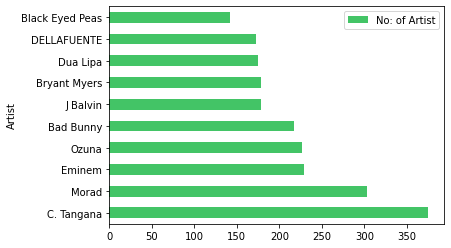

In [4]:
df1.head(10).plot.barh(x ='Artist', y='No: of Artist', color='#43c466')

In [5]:
df1_list = df1['Artist'].head(10).tolist()

In [6]:
print(df1_list)

['C. Tangana', 'Morad', 'Eminem', 'Ozuna', 'Bad Bunny', 'J Balvin', 'Bryant Myers', 'Dua Lipa', 'DELLAFUENTE', 'Black Eyed Peas']


In [7]:
import numpy as np
a =np.array(df1_list).astype(str)

In [8]:
track_list = data_pd['trackName'].tolist()
print(track_list)

["Girl, You'll Be a Woman Soon", 'Roses - Imanbek Remix', 'Yelo', 'Like Nicki', 'FRIENDS', 'Snake', 'The Final Countdown', "California Dreamin'", 'Yelo', 'Tu Eres Un Bom Bom - Remix', 'Nunca Estoy', 'My Head Is a Jungle - MK Rremix Radio Edit', 'La Santa', 'If The World Was Ending - Spanglish Version', 'Instagram', 'Vicky - Remix', 'Belfast', 'Etapas raras', 'Roses - Imanbek Remix', 'Yelo', 'Tu Eres Un Bom Bom - Remix', 'You Never Can Tell', 'Johnny B. Goode', 'Johnny B. Goode', 'You Never Can Tell', 'Roll Over Beethoven', 'No Particular Place To Go', 'Roses - Imanbek Remix', 'Yelo', 'Quién Me Ha Robado el Mes de Abril', 'Magic In The Hamptons (feat. Lil Yachty)', 'Magic In The Hamptons (feat. Lil Yachty)', 'Scared to Be Lonely', 'Yelo', 'Nunca Estoy', 'Snake', 'Firestone', 'Roses - Imanbek Remix', 'Yelo', 'Tu Eres Un Bom Bom - Remix', 'Earth', 'Like Nicki', 'La Cama - Remix', 'Bobo', 'PAM', 'Easy - Remix', 'Kemba Walker', 'Nunca Estoy', 'La Santa', 'Intentions (feat. Quavo)', 'Like Ni

In [9]:
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy
import json
import csv
import pylyrics3
import nltk

from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
import spotipy.util as util

client_id ="d9833cd67ed34683b793cd4cee4a0c09" 
secret = "32c1d6dfe3924e1781904bc03e70d73e" 
client_credentials_manager = SpotifyClientCredentials(client_id, client_secret=secret) 
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)
username =	'11159352293'
redirect_uri = 'http://localhost:7777/callback'
scope = 'user-read-recently-played'

token = util.prompt_for_user_token(username=username, 
                                   scope=scope, 
                                   client_id=client_id,   
                                   client_secret=secret,     
                                   redirect_uri=redirect_uri)


artist= 'Moses Sumney'
track= 'Lonely World'



import requests
def get_id(track_name: str, token: str, artist: str) -> str:
     headers = {
    'Accept': 'application/json',
    'Content-Type': 'application/json',
    'Authorization': f'Bearer ' + token,
    }
     params = [('q', track_name), ('type', 'track'),]
    
    
    
     try:
        response = requests.get('https://api.spotify.com/v1/search', 
                    headers = headers, params = params, timeout = 5)
        json = response.json()
        first_result = json['tracks']['items'][0]
        track_id = first_result['id']
        return track_id
     except:
        return None

In [10]:
id_list=[]
for i in track_list:

    ids = get_id(i, token, artist='idk')
    id_list.append(ids)
print(id_list)

['5u6Woby9oKAF8LhhuxykH1', '24Yi9hE78yPEbZ4kxyoXAI', '3OUPJPD1OmFd8gL7ztY9v8', '5GeASqtpUZmAL8nzYU7Isl', '08bNPGLD8AhKpnnERrAc6G', '3wdnX9UwfyXkNq0FJVhQQD', '3MrRksHupTVEQ7YbA0FsZK', '4s6LhHAV5SEsOV0lC2tjvJ', '3OUPJPD1OmFd8gL7ztY9v8', '2635EEV2Oi6wg6GV2TPYVx', '6N4ioa3XSbvjmwdVEERl8F', '7rKGiHaQXNfikuei3l5JnZ', '69vlMrzHwATKzupwNcUPyK', '5Lp9GcZAY7H2M2NjIS3Cdn', '0U6bQIAh6MCGo1xjbIIx2S', '6jbL9vVBUmzqUV3meQoi7M', '5BsmUIjgwobAwCh1WMvQip', '0bZoCs8KZzPC3TSXsyiZN3', '24Yi9hE78yPEbZ4kxyoXAI', '3OUPJPD1OmFd8gL7ztY9v8', '2635EEV2Oi6wg6GV2TPYVx', '6FT83pFXKhDlXDsNJFAHWz', '2QfiRTz5Yc8DdShCxG1tB2', '2QfiRTz5Yc8DdShCxG1tB2', '6FT83pFXKhDlXDsNJFAHWz', '6C7aTTCUWRK7dD379yUT3W', '3qt3ybU6MScMxMKL2TYBvt', '24Yi9hE78yPEbZ4kxyoXAI', '3OUPJPD1OmFd8gL7ztY9v8', '1HX9kKDz6dG4fmLBuKVzOF', '2Yer0p7uB2lVBUAtANuuQp', '2Yer0p7uB2lVBUAtANuuQp', '3ebXMykcMXOcLeJ9xZ17XH', '3OUPJPD1OmFd8gL7ztY9v8', '6N4ioa3XSbvjmwdVEERl8F', '3wdnX9UwfyXkNq0FJVhQQD', '1I8tHoNBFTuoJAlh4hfVVE', '24Yi9hE78yPEbZ4kxyoXAI', '3OUPJPD1Om

In [11]:
id_list = [x for x in id_list if x is not None]

In [12]:
print(len(id_list))

15847


In [13]:
def getTrackFeatures(id):
    track_info = sp.track(id)
    features_info = sp.audio_features(id)
    #Información de la canción
    name = track_info['name']
    length = track_info['duration_ms']
    popularity = track_info['popularity']
    #Track features
    acousticness = features_info[0]['acousticness']
    danceability = features_info[0]['danceability']
    energy = features_info[0]['energy']
    instrumentalness = features_info[0]['instrumentalness']
    liveness = features_info[0]['liveness']
    loudness = features_info[0]['loudness']
    speechiness = features_info[0]['speechiness']
    tempo = features_info[0]['tempo']
    time_signature = features_info[0]['time_signature']
    
    track_data = [name, length, popularity, acousticness, danceability, energy, instrumentalness, liveness, loudness, speechiness, tempo, time_signature]
    return track_data

In [14]:
import time

In [15]:
from tqdm import tqdm
listOfTrack_AudioFeatures = []

IDs_AlreadyUsed = []

#i = 1
for track_ID in tqdm(id_list):#tqdm es para tener la progress bar
    #sp.audio_analysis("2xmrfQpmS2iJExTlklLoAL")
    
    #track = sp.track(track_ID)
    #print(track_SP)
    
    #track_Name = track["name"]     

    #track_explicit = track['explicit']
    
    
    
    features = sp.audio_features(track_ID)[0] # Get audio features for this specific track

    if features != None:
    
        track_AudioFeatures = [features['energy'], features['liveness'],
                               features['tempo'], features['speechiness'],
                               features['acousticness'], features['instrumentalness'],
                               features['time_signature'], features['danceability'],
                               features['key'], features['duration_ms'],
                               features['loudness'], features['valence'],
                               features['mode'], features['uri']]
    else:
        track_AudioFeatures = [None]*14


    #trackData = ( [ track_Name, track_ID, track_explicit] + track_AudioFeatures )
    trackData = ( [track_ID] + track_AudioFeatures )

    listOfTrack_AudioFeatures.append(trackData)

    #break
    #print(features)

    IDs_AlreadyUsed.append(track_ID)

    time.sleep(0.05)
    #print(i, i/63902)
    
    #i += 1

100%|██████████| 15847/15847 [28:37<00:00,  9.23it/s] 


In [16]:
l1 = id_list

l2 = IDs_AlreadyUsed

TrackIDs_StillNotParsed = [x for x in l1 if x not in l2]

In [17]:
TrackIDs_StillNotParsed [:10]

[]

In [18]:
audioFeaturesDF_AllTracks = pd.DataFrame(listOfTrack_AudioFeatures, 
                                columns=  [ "track_id",  #["track_name", "track_id", "explicit",
                                            'energy', 'liveness',
                                            'tempo', 'speechiness',
                                            'acousticness', 'instrumentalness',
                                            'time_signature', 'danceability',
                                            'key', 'duration_ms', 'loudness',
                                            'valence', 'mode', 'track_uri'])

In [19]:
audioFeaturesDF_AllTracks.head()

track_id  energy  liveness    tempo  speechiness  \
0  5u6Woby9oKAF8LhhuxykH1   0.584     0.205  114.142       0.0420   
1  24Yi9hE78yPEbZ4kxyoXAI   0.724     0.353  121.975       0.0495   
2  3OUPJPD1OmFd8gL7ztY9v8   0.670     0.205  135.038       0.0348   
3  5GeASqtpUZmAL8nzYU7Isl   0.459     0.101   76.428       0.0872   
4  08bNPGLD8AhKpnnERrAc6G   0.880     0.128   95.079       0.0504   

   acousticness  instrumentalness  time_signature  danceability  key  \
0        0.0698          0.000183               4         0.514    5   
1        0.0167          0.010700               4         0.770    8   
2        0.4210          0.000008               4         0.826   11   
3        0.0292          0.000000               4         0.593    8   
4        0.2050          0.000000               4         0.626    9   

   duration_ms  loudness  valence  mode                             track_uri  
0       189627   -13.049    0.558     1  spotify:track:5u6Woby9oKAF8LhhuxykH1  
1       176840    -5.484    0.898     1  spotify:track:24Yi9hE78yPEbZ4kxyoXAI  
2       189357    -3.806    0.792     1  spotify:track:3OUPJPD1OmFd8gL7ztY9v8  
3       155298    -8.257    0.485     1  spotify:track:5GeASqtpUZmAL8nzYU7Isl  
4       202621    -2.384    0.534     0  spotify:track:08bNPGLD8AhKpnnERrAc6G

In [20]:
audioFeaturesDF_AllTracks.shape

(15847, 15)

In [21]:
audioFeaturesDF_AllTracks.to_csv("./Track_AudioFeatures_AllTracks.csv")

In [22]:
audioFeaturesDF_AllTracks_1 = pd.read_csv("./Track_AudioFeatures_AllTracks.csv").drop(["Unnamed: 0"], axis = 1)

In [23]:
audioFeaturesDF_AllTracks_1.head(20)

track_id  energy  liveness    tempo  speechiness  \
0   5u6Woby9oKAF8LhhuxykH1   0.584    0.2050  114.142       0.0420   
1   24Yi9hE78yPEbZ4kxyoXAI   0.724    0.3530  121.975       0.0495   
2   3OUPJPD1OmFd8gL7ztY9v8   0.670    0.2050  135.038       0.0348   
3   5GeASqtpUZmAL8nzYU7Isl   0.459    0.1010   76.428       0.0872   
4   08bNPGLD8AhKpnnERrAc6G   0.880    0.1280   95.079       0.0504   
5   3wdnX9UwfyXkNq0FJVhQQD   0.443    0.2820  109.908       0.1380   
6   3MrRksHupTVEQ7YbA0FsZK   0.843    0.0608  117.662       0.0616   
7   4s6LhHAV5SEsOV0lC2tjvJ   0.608    0.0533  112.367       0.0345   
8   3OUPJPD1OmFd8gL7ztY9v8   0.670    0.2050  135.038       0.0348   
9   2635EEV2Oi6wg6GV2TPYVx   0.706    0.3460   97.011       0.1770   
10  6N4ioa3XSbvjmwdVEERl8F   0.369    0.3090  135.019       0.1200   
11  7rKGiHaQXNfikuei3l5JnZ   0.789    0.2530  124.023       0.0355   
12  69vlMrzHwATKzupwNcUPyK   0.868    0.0822   93.037       0.0470   
13  5Lp9GcZAY7H2M2NjIS3Cdn   0.465    0.0939   74.450       0.2120   
14  0U6bQIAh6MCGo1xjbIIx2S   0.906    0.4230   96.071       0.0965   
15  6jbL9vVBUmzqUV3meQoi7M   0.684    0.6550  171.990       0.3110   
16  5BsmUIjgwobAwCh1WMvQip   0.586    0.0776   90.024       0.2090   
17  0bZoCs8KZzPC3TSXsyiZN3   0.781    0.2900   88.912       0.3870   
18  24Yi9hE78yPEbZ4kxyoXAI   0.724    0.3530  121.975       0.0495   
19  3OUPJPD1OmFd8gL7ztY9v8   0.670    0.2050  135.038       0.0348   

    acousticness  instrumentalness  time_signature  danceability  key  \
0        0.06980          0.000183               4         0.514    5   
1        0.01670          0.010700               4         0.770    8   
2        0.42100          0.000008               4         0.826   11   
3        0.02920          0.000000               4         0.593    8   
4        0.20500          0.000000               4         0.626    9   
5        0.18800          0.002250               4         0.943    7   
6        0.06280          0.000827               4         0.529    6   
7        0.35200          0.000000               4         0.552    1   
8        0.42100          0.000008               4         0.826   11   
9        0.00985          0.000131               4         0.882    1   
10       0.47600          0.006090               4         0.913    2   
11       0.08640          0.004190               4         0.683    7   
12       0.03260          0.000000               4         0.744    1   
13       0.87100          0.000000               4         0.395    1   
14       0.12500          0.000000               4         0.765    8   
15       0.23000          0.000000               4         0.829    8   
16       0.11800          0.000000               4         0.782   10   
17       0.38800          0.000000               4         0.768    9   
18       0.01670          0.010700               4         0.770    8   
19       0.42100          0.000008               4         0.826   11   

    duration_ms  loudness  valence  mode                             track_uri  
0        189627   -13.049    0.558     1  spotify:track:5u6Woby9oKAF8LhhuxykH1  
1        176840    -5.484    0.898     1  spotify:track:24Yi9hE78yPEbZ4kxyoXAI  
2        189357    -3.806    0.792     1  spotify:track:3OUPJPD1OmFd8gL7ztY9v8  
3        155298    -8.257    0.485     1  spotify:track:5GeASqtpUZmAL8nzYU7Isl  
4        202621    -2.384    0.534     0  spotify:track:08bNPGLD8AhKpnnERrAc6G  
5        183307   -10.098    0.621     0  spotify:track:3wdnX9UwfyXkNq0FJVhQQD  
6        310333    -6.908    0.188     0  spotify:track:3MrRksHupTVEQ7YbA0FsZK  
7        162373    -9.786    0.637     0  spotify:track:4s6LhHAV5SEsOV0lC2tjvJ  
8        189357    -3.806    0.792     1  spotify:track:3OUPJPD1OmFd8gL7ztY9v8  
9        173453    -5.015    0.529     1  spotify:track:2635EEV2Oi6wg6GV2TPYVx  
10       162493    -5.299    0.436     1  spotify:track:6N4ioa3XSbvjmwdVEERl8F  
11       207253    -6.672    0.456     0 